In [41]:
import os
import shutil
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import nibabel as nib
from sklearn.metrics import confusion_matrix, accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, SGD
from torch.utils.data import Dataset, TensorDataset, DataLoader

In [29]:
!conda install -y gdown

Channels:
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.



# Unzip File

In [ ]:
import tarfile

def extract(tar_file, path):
    opened_tar = tarfile.open(tar_file)
     
    if tarfile.is_tarfile(tar_file):
        opened_tar.extractall(path)
    else:
        print("The tar file you entered is not a tar file")

In [ ]:
extract("/kaggle/input/brats-2021-task1/BraTS2021_Training_Data.tar", "/kaggle/working/")

In [33]:
import gdown

In [34]:
url = "https://drive.google.com/drive/folders/1Z7a_TAvOaaqkggkajXDa8mma1Hb2MHJX?usp=drive_link"
gdown.download_folder(url)

Retrieving folder contents


RuntimeError: Cannot retrieve the folder information from the link. You may need to change the permission to 'Anyone with the link', or have had many accesses. Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

# How to read and plot a nii file

[[ -1.  -0.  -0.   0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]] 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffs

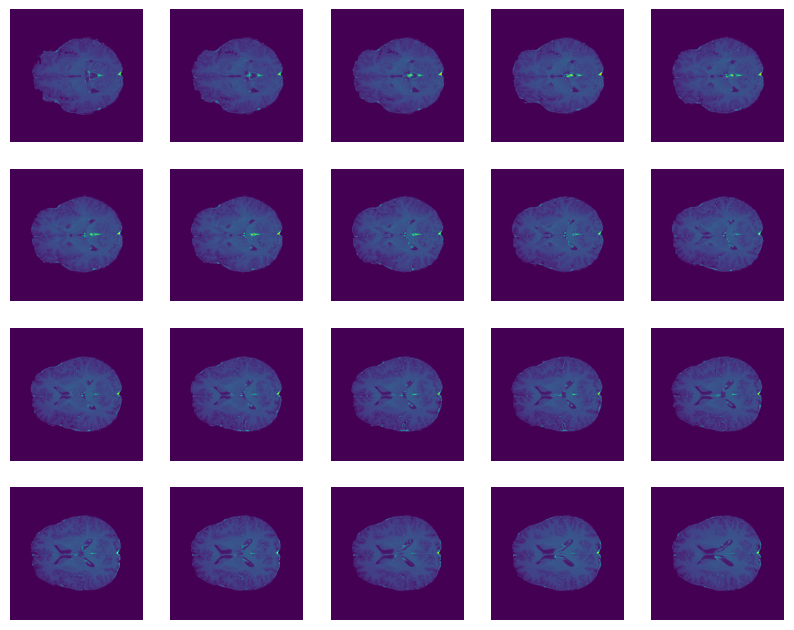

In [10]:
nii_img = nib.load("/kaggle/input/brats2021/00000088_brain_t1ce.nii")
nii_data = nii_img.get_fdata()
nii_aff  = nii_img.affine
nii_hdr  = nii_img.header

print(nii_aff ,'\n',nii_hdr)
print(nii_data.shape)

# Define the number of columns for subplot
num_columns = 5

if(len(nii_data.shape)==3):
    start_slice = 70
    end_slice = 89
    num_slices = end_slice - start_slice + 1
    num_rows = num_slices // num_columns + 1

    fig, ax = plt.subplots(num_rows, num_columns, figsize=(10,10))

    for i in range(start_slice, end_slice+1):
        row = (i-start_slice) // num_columns
        col = (i-start_slice) % num_columns
        ax[row, col].imshow(nii_data[:,:,i])
        ax[row, col].axis('off')

    # Remove empty subplots
    for j in range(i-start_slice+1, num_rows*num_columns):
        fig.delaxes(ax.flatten()[j])

    plt.show()

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z     

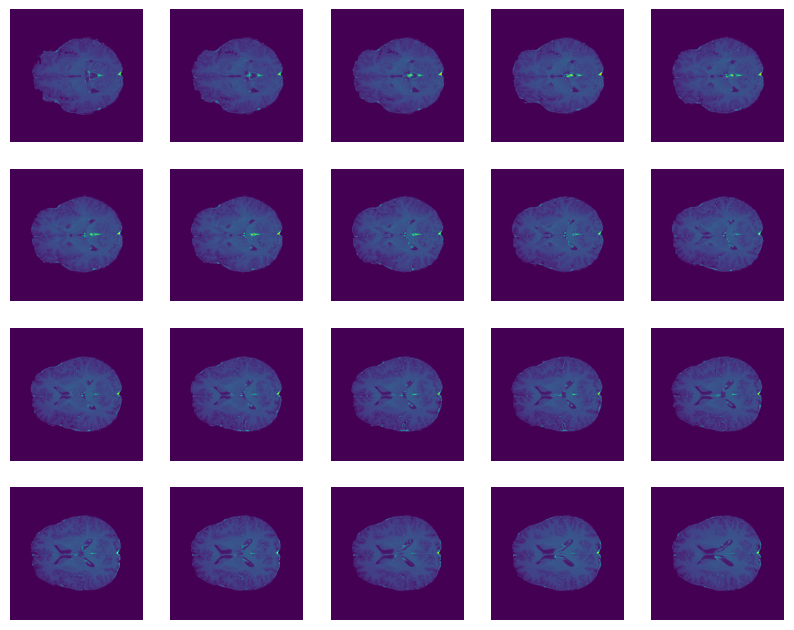

In [11]:
nii_img = nib.load("/kaggle/input/brats2021/00008_post_normalized.nii")
nii_data = nii_img.get_fdata()
nii_aff  = nii_img.affine
nii_hdr  = nii_img.header

print(nii_aff ,'\n',nii_hdr)
print(nii_data.shape)

# Define the number of columns for subplot
num_columns = 5

if(len(nii_data.shape)==3):
    start_slice = 70
    end_slice = 89
    num_slices = end_slice - start_slice + 1
    num_rows = num_slices // num_columns + 1

    fig, ax = plt.subplots(num_rows, num_columns, figsize=(10,10))

    for i in range(start_slice, end_slice+1):
        row = (i-start_slice) // num_columns
        col = (i-start_slice) % num_columns
        ax[row, col].imshow(nii_data[:,:,i])
        ax[row, col].axis('off')

    # Remove empty subplots
    for j in range(i-start_slice+1, num_rows*num_columns):
        fig.delaxes(ax.flatten()[j])

    plt.show()

[[ -1.  -0.  -0.  -0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]] 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : -0.0
qoffs

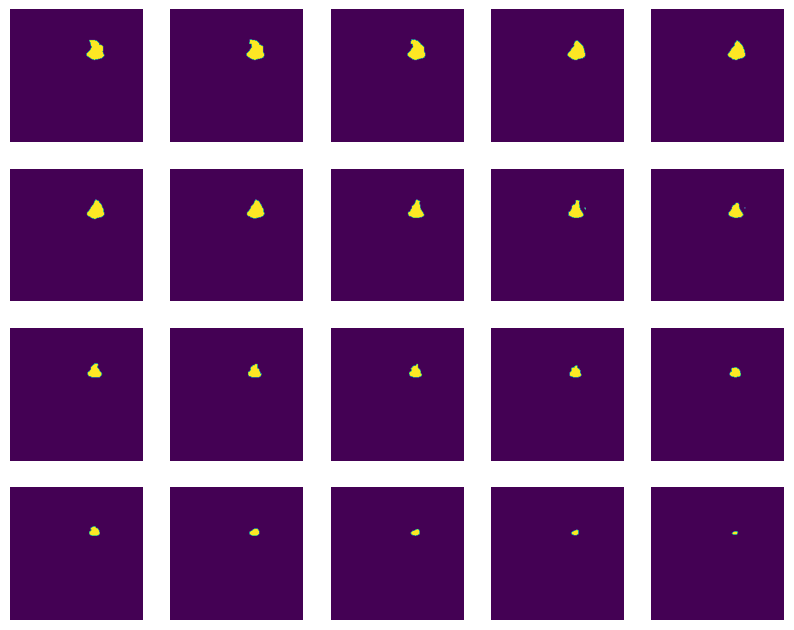

In [13]:
nii_img = nib.load("/kaggle/input/brats2021/BraTS2021_00008_seg.nii/00000088_final_seg.nii")
nii_data = nii_img.get_fdata()
nii_aff  = nii_img.affine
nii_hdr  = nii_img.header

print(nii_aff ,'\n',nii_hdr)
print(nii_data.shape)

# Define the number of columns for subplot
num_columns = 5

if(len(nii_data.shape)==3):
    start_slice = 70
    end_slice = 89
    num_slices = end_slice - start_slice + 1
    num_rows = num_slices // num_columns + 1

    fig, ax = plt.subplots(num_rows, num_columns, figsize=(10,10))

    for i in range(start_slice, end_slice+1):
        row = (i-start_slice) // num_columns
        col = (i-start_slice) % num_columns
        ax[row, col].imshow(nii_data[:,:,i])
        ax[row, col].axis('off')

    # Remove empty subplots
    for j in range(i-start_slice+1, num_rows*num_columns):
        fig.delaxes(ax.flatten()[j])

    plt.show()

# Dataset Class

In [36]:
folder = "/kaggle/working/"

In [40]:
!mkdir mri
!mkdir mask

In [48]:
for folder in os.listdir():
    if os.path.isdir(folder):  # Check if the item is a directory
        files = os.listdir(os.path.join(os.getcwd(), folder))
        for file in files:
            if file.endswith("seg.nii.gz"):
                shutil.move(os.path.join(os.getcwd(), folder, file), os.path.join("/kaggle/working/mask",file))

In [49]:
for folder in os.listdir():
    if os.path.isdir(folder):  # Check if the item is a directory
        files = os.listdir(os.path.join(os.getcwd(), folder))
        for file in files:
            if file.endswith("t1.nii.gz"):
                shutil.move(os.path.join(os.getcwd(), folder, file), os.path.join("/kaggle/working/mri",file))

In [56]:
assert len(os.listdir('mri')) == len(os.listdir('mask')), 'There are some missing images or masks'

In [98]:
class BraTSDataset(Dataset):    
    def __init__(self, data_root_folder, folder = '', n_sample=None):
        self.folder = os.path.join(data_root_folder, folder)
        self.imgs_dir = os.path.join(self.folder, 'mri')
        self.masks_dir = os.path.join(self.folder, 'mask')
        ##self.n_sample = len(os.listdir(self.imgs_dir)) # number of scans
        
        self.imgs_file = sorted(glob.glob(os.path.join(self.imgs_dir, '*.nii.gz')))
        self.masks_file = sorted(glob.glob(os.path.join(self.masks_dir, '*.nii.gz')))

        assert len(self.imgs_file) == len(self.masks_file), 'There are some missing images or masks in {0}'.format(folder)
        
        self.ids =  list(file.split("_")[1] for file in os.listdir(self.imgs_dir))

    def __getitem__(self, index):
        idx = self.ids[index]
        # read a single nii
        single_image_path = self.imgs_file[index]
        single_image_nii = nib.load(single_image_path)
        single_image_arrary = single_image_nii.get_fdata()
        single_image_arrary = single_image_arrary.astype(np.float32)

        # add dimension for 3d conv
        ##single_image_arrary = np.expand_dims(single_image_arrary, axis=0)
        single_image_arrary = single_image_arrary.astype(np.float32)
  
        # to tensor
        img_as_tensor = torch.from_numpy(single_image_arrary)

        # read a single nii
        single_mask_path = self.masks_file[index]
        single_mask_nii = nib.load(single_mask_path)
        single_mask_arrary = single_mask_nii.get_fdata()
        single_mask_arrary = single_mask_arrary.astype(np.float32)
        
        ## FIXME : do we need this?
        ## FIXME : do we need to normalize?
        # add dimension for 3d conv
        ## single_mask_arrary = np.expand_dims(single_mask_arrary, axis=0)
        single_mask_arrary = single_mask_arrary.astype(np.float32)
  
        # to tensor
        mask_as_tensor = torch.from_numpy(single_mask_arrary)
        return {
            'image': img_as_tensor,
            'mask': mask_as_tensor,
            'img_id': idx
        }
 
    def __len__(self):
        return len(self.imgs_file)

# Load Dataset

In [99]:
dataset = BraTSDataset(data_root_folder = os.getcwd())

In [100]:
train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [105]:
image = next(iter(train_dataloader))['image']
element = image[0, 120, 120, :]
print(element)

tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 1260.,
        1332., 1342., 1893., 2704., 3010., 3011., 3113., 3174., 3199., 3217.,
        3248., 3272., 3298., 3378., 3471., 3506., 3463., 3513., 3603., 3644.,
        3602., 3628., 3745., 3616., 3450., 3511., 3660., 3629., 3498., 3380.,
        3373., 3386., 3231., 3178., 3144., 3169., 3070., 2851., 2692., 2640.,
        2675., 2785., 2813., 2686., 2882., 2871., 2792., 2855., 2836., 2881.,
        2765., 2811., 2724., 2868., 2709., 2820., 2795., 2722., 2845., 2827.,
        2788., 2818., 2725., 2763., 2843., 2925., 3089., 3106., 2872., 2791.,
        2453., 2829., 3407., 3516., 3365., 3235., 3341., 3449., 3401., 3253.,
        3175., 3093., 2815., 2531., 2446., 2343., 2263., 2155., 2053., 2033.,
        2045., 2106., 2161., 2078., 2099., 2036., 1997., 1939., 1923., 1890.,
        1819., 1783., 1818., 1744., 1651., 1602., 1654., 1809., 

# U-Net

In [23]:
class conv_block(nn.Module):
    def __init__(self, ch_in, ch_out):
        super(conv_block, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(ch_in, ch_out, kernel_size=3, stride=1, padding=1, bias=True),
            nn.GroupNorm(32, ch_out),
            nn.ReLU(inplace=True),
            nn.Conv2d(ch_out, ch_out, kernel_size=3, stride=1, padding=1, bias=True),
            nn.GroupNorm(32, ch_out),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class resconv_block(nn.Module):
    def __init__(self, ch_in, ch_out):
        super(resconv_block, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(ch_in, ch_out, kernel_size=3, stride=1, padding=1, bias=True),
            nn.GroupNorm(32, ch_out),
            nn.ReLU(inplace=True),
            nn.Conv2d(ch_out, ch_out, kernel_size=3, stride=1, padding=1, bias=True),
            nn.GroupNorm(32, ch_out),
            nn.ReLU(inplace=True)
        )
        self.Conv_1x1 = nn.Conv2d(ch_in, ch_out, kernel_size=1, stride=1, padding=0)

    def forward(self, x):

        residual = self.Conv_1x1(x)
        x = self.conv(x)

        return residual + x


class up_conv(nn.Module):
    def __init__(self, ch_in, ch_out):
        super(up_conv, self).__init__()
        self.up = nn.Sequential(
            nn.Upsample(scale_factor=2),
            nn.Conv2d(ch_in, ch_out, kernel_size=3, stride=1, padding=1, bias=True),
            nn.GroupNorm(32, ch_out),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.up(x)
        return x

In [24]:
class Attention_block(nn.Module):
    def __init__(self, F_g, F_l, F_int):
        super(Attention_block, self).__init__()
        self.W_g = nn.Sequential(
            nn.Conv2d(F_g, F_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.GroupNorm(32, F_int)
        )

        self.W_x = nn.Sequential(
            nn.Conv2d(F_l, F_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.GroupNorm(32, F_int)
        )

        self.psi = nn.Sequential(
            nn.Conv2d(F_int, 1, kernel_size=1, stride=1, padding=0, bias=True),
            nn.GroupNorm(1, 1),
            nn.Sigmoid()
        )

        self.relu = nn.ReLU(inplace=True)

    def forward(self, g, x):
        g1 = self.W_g(g)
        x1 = self.W_x(x)
        psi = self.relu(g1 + x1)
        psi = self.psi(psi)

        return x * psi


class U_Net(nn.Module):
    def __init__(self, img_ch=3, output_ch=1, first_layer_numKernel=64):
        super(U_Net, self).__init__()

        self.Maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.Conv1 = conv_block(ch_in=img_ch, ch_out=first_layer_numKernel)
        self.Conv2 = conv_block(ch_in=first_layer_numKernel, ch_out=2 * first_layer_numKernel)
        self.Conv3 = conv_block(ch_in=2 * first_layer_numKernel, ch_out=4 * first_layer_numKernel)
        self.Conv4 = conv_block(ch_in=4 * first_layer_numKernel, ch_out=8 * first_layer_numKernel)
        self.Conv5 = conv_block(ch_in=8 * first_layer_numKernel, ch_out=16 * first_layer_numKernel)

        self.Up5 = up_conv(ch_in=16 * first_layer_numKernel, ch_out=8 * first_layer_numKernel)
        self.Up_conv5 = conv_block(ch_in=16 * first_layer_numKernel, ch_out=8 * first_layer_numKernel)

        self.Up4 = up_conv(ch_in=8 * first_layer_numKernel, ch_out=4 * first_layer_numKernel)
        self.Up_conv4 = conv_block(ch_in=8 * first_layer_numKernel, ch_out=4 * first_layer_numKernel)

        self.Up3 = up_conv(ch_in=4 * first_layer_numKernel, ch_out=2 * first_layer_numKernel)
        self.Up_conv3 = conv_block(ch_in=4 * first_layer_numKernel, ch_out=2 * first_layer_numKernel)

        self.Up2 = up_conv(ch_in=2 * first_layer_numKernel, ch_out=first_layer_numKernel)
        self.Up_conv2 = conv_block(ch_in=2 * first_layer_numKernel, ch_out=first_layer_numKernel)

        self.Conv_1x1 = nn.Sequential(
            nn.Conv2d(first_layer_numKernel, output_ch, kernel_size=1, stride=1, padding=0), nn.Sigmoid()  # Use sigmoid activation for binary segmentation
        )
        # self.Conv_1x1 =  nn.Conv2d(first_layer_numKernel, output_ch, kernel_size = 1, stride = 1, padding = 0)

    def forward(self, x):
        # encoding path
        x1 = self.Conv1(x)

        x2 = self.Maxpool(x1)
        x2 = self.Conv2(x2)

        x3 = self.Maxpool(x2)
        x3 = self.Conv3(x3)

        x4 = self.Maxpool(x3)
        x4 = self.Conv4(x4)

        x5 = self.Maxpool(x4)
        x5 = self.Conv5(x5)

        # decoding + concat path
        d5 = self.Up5(x5)
        d5 = torch.cat((x4, d5), dim=1)

        d5 = self.Up_conv5(d5)

        d4 = self.Up4(d5)
        d4 = torch.cat((x3, d4), dim=1)
        d4 = self.Up_conv4(d4)

        d3 = self.Up3(d4)
        d3 = torch.cat((x2, d3), dim=1)
        d3 = self.Up_conv3(d3)

        d2 = self.Up2(d3)
        d2 = torch.cat((x1, d2), dim=1)
        d2 = self.Up_conv2(d2)

        d1 = self.Conv_1x1(d2)

        return d1